# ALGORITMOS BASEADOS EM ÁRVORES DE DECISÃO

### Neste notebook você encontrará:

**Referências e DataSet**<br/>
**Introdução ao Algoritmo**<br/>
**Como Funciona**<br/>
**Prós e Contras do Modelo**<br/>
**Algoritmos Baseados em Árvores - Random Forest** <br/>
**Aplicando Random Forest**

### Referências

https://www.analyticsvidhya.com/blog/2016/04/tree-based-algorithms-complete-tutorial-scratch-in-python/

https://www.datacamp.com/community/tutorials/decision-tree-classification-python

https://scikit-learn.org/stable/modules/tree.html

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble

### DataSet

https://www.kaggle.com/chitwanmanchanda/fraudulent-transactions-data

### Introdução ao Algoritmo

Árvore, no contexto da programação, engenharia de software e ciência da computação, é uma das mais importantes estruturas de dados não lineares. São estruturas eficientes e simples em relação ao tratamento computacional. Há inúmeros problemas no mundo real que podem ser modelados e resolvidos através dos algoritmos baseados em árvores de decisão.

Esses tipos de algoritmos são considerados um dos melhores e mais utilizados métodos de aprendizagem supervisionada. Eles nos dão modelos preditivos de alta precisão, estabilidade e facilidade de interpretação. Ao contrário dos modelos lineares, eles mapeiam muito bem relações não lineares, como dito anteriormente, e podem ser adaptados para resolver tanto problemas de regressão, quanto problemas de classificação. Tudo isso com a leitura de variáveis independentes discretas ou contínuas.

Semelhante a construção de um fluxograma onde cada ponto de decisão cria um novo fluxo, na árvore de decisão temos que, cada ramificação cria um novo nó e, como padrão, usualmente chamamos de nó raiz o nó mais alto da árvore e de nó folha o mais baixo (onde encontramos o resultado).<br/>
É esta possibilidade de criação visual que nos permite uma maior facilidade no entendimento de seu funcionamento:

<br/>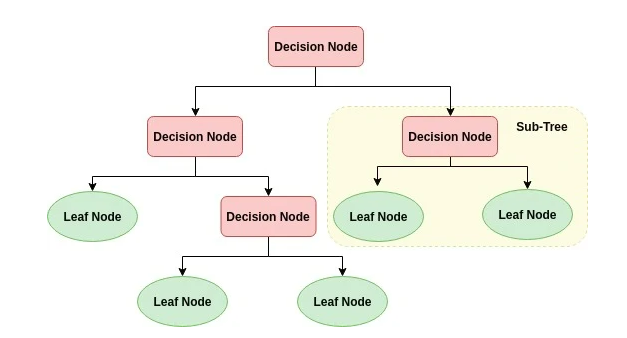<br/>

Para entender melhor a diferença de uma árvore de decisão de regressão para uma de classificação, podemos pontuar que:
- Na de regressão queremos de resultado uma variável contínua, já na de classificação queremos um resultado categórico
- Na árvore de regressão o resultado assumido pelo nó é a média de todas as observações já na classificação é sua moda

### Como Funciona

A ideia básica por trás de qualquer algoritmo de árvore de decisão é:
1) Selecionar característica capazes de dividir os grupos <br/>
2) Fazer dessa característica um nó de decisão que divida um grupo maior em subgrupos menores <br/>
3) Repetir este processo para cada subgrupo criado até que um critério de parada seja atingido <br/>

Entraremos em mais detalhes sobre cada uma dessas etapas, mas para isso tomemos o seguinte exemplo:

Digamos que uma amostra de 30 alunos tem três variáveis: Sexo (menino ou menina), Classe (IX ou X) e Altura (< 1,7 m e >= 1,7 m). Digamos também que 15 destes 30 jogam tênis no recreio. 

<br/>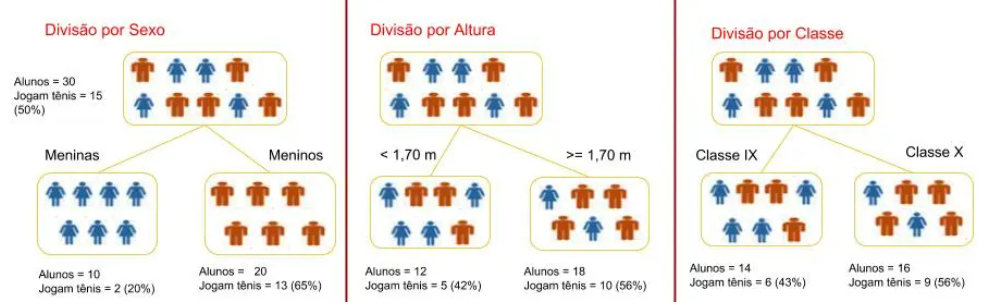<br/>

**1) Selecionar característica para divisão...**

Aqui as características, variáveis independentes do modelo, são levadas em consideração para a possível criação de subgrupos. No exemplo temos que podemos dividir o todo em classes como Sexo, Classe e Altura.

**2) Como fazer a divisão dos nós de uma árvore?**

Primeiro temos que os critérios de decisão para divisão são diferentes para árvores de classificação e de regressão. Temos vários métodos que decidem se a divisão será feita em dois ou mais sub-nós. A criação de sub-nós aumenta a homogeneidade, a pureza, dos dados e, é esse tipo de sub-nós que buscamos. Precisamos pontuar também que, em modelos de árvore de decisão, a divisão é feita sempre levando em consideração a melhor divisão naquele momento, por isso esses modelos são chamados de gananciosos, ou seja, o passo à frente não é levado em consideração no momento atual. <br/>
Abaixo, veremos então alguns métodos para escolha do melhor critério de divisão.

**Métodos de Divisão para Árvores de Classificação:**

**Índice Gini:** <br/>

Tem como fundamento que, se selecionarmos aleatoriamente dois itens de uma população da mesma classe e a probabilidade destes dois itens serem iguais for de 100% teremos então uma população pura, totalmente homogênea.<br/>
Como calcular:<br/>
- Calcula a soma dos quadrados da probabilidade de sucesso e de fracasso (p^2 + q^2)
- Calcula a soma ponderada dos itens da classe

Seguindo o exemplo trazido, como encontrar a divisão mais homogênea para encontrar quem joga tênis: <br/>
Divisão por Sexo: <br/>
Sub-nó Meninos: (0,65)^2 + (0,35)^2 = 0,55 <br/>
Sub-nó Meninas: (0,20)^2 + (0,80)^2 = 0,68 <br/>
Ponderação da divisão por Sexo: (20/30) x 0,55 + (10/30) x 0,68 = 0,59

Divisão por Altura: <br/>
Sub-nó >=1,70: (0,56)^2 + (0,44)^2 ~ 0,51 <br/>
Sub-nó <1,70: (0,42)^2 + (0,58)^2 ~ 0,51 <br/>
Ponderação da divisão por Sexo: (18/30) * 0,51 + (12/30) * 0,51 = 0,51

Divisão por Classe: <br/>
Sub-nó X: (0,56)^2 + (0,44)^2 ~ 0,51 <br/>
Sub-nó IX: (0,43)^2 + (0,57)^2 ~ 0,51 <br/>
Ponderação da divisão por Sexo: (16/30) * 0,51 + (14/30) * 0,51 = 0,51

Como a divisão por sexo obteve um resultado ponderado mais próximo da pureza que os demais, temos que a melhor divisão do nó ocorreria ali.

**Qui-Quadrado:** <br/>

A estatística qui-quadrado é uma medida de divergência entre a distribuição dos dados e uma distribuição esperada ou hipotética. É medido pela soma dos quadrados das diferenças entre as frequências observadas e esperadas da variável alvo. <br/>
Como calcular: <br/>
- Qui-quadrado = ((Real – Esperado) ^ 2 / Esperado)

Seguindo no mesmo exemplo... <br/>
Divisão por Sexo: <br/>
Vamos explicar como fazer pelo nó das meninas. O valor real para “Joga tênis” e “Não joga tênis” é de 2 e 8, respectivamente. O valor esperado de “Joga tênis” e “Não joga tênis” seria de 5 para ambos, porque o nó pai tem probabilidade de 50% e aplicamos a mesma probabilidade na contagem de meninas (10). tomando este exemplo, conseguimos realizar os demais. <br/>
Aplique a fórmula do qui-quadrado para as frequências de meninas que "Joga tênis" = (2 - 5) ^ 2 / 5 = 1,8. <br/>
Aplique a fórmula do qui-quadrado para as frequências de meninos que "Joga tênis" = (13 - 10) ^ 2 / 10 = 0,9. <br/>
Soma dos qui-quadrados = 1,8 + 0,9 = 2,7

Divisão por Altura: <br/>
Aplique a fórmula do qui-quadrado para as frequências de >=1,70 que "Joga tênis" = (10 - 9) ^ 2 / 9 = 0,11. <br/>
Aplique a fórmula do qui-quadrado para as frequências de <1,70 que "Joga tênis" = (5 - 6) ^ 2 / 6 = 0,16. <br/>
Soma dos qui-quadrados = 0,11 + 0,16 = 0,27

Divisão por Classe: <br/>
Aplique a fórmula do qui-quadrado para as frequências de classe X que "Joga tênis" = (9 - 8) ^ 2 / 8 = 0,125. <br/>
Aplique a fórmula do qui-quadrado para as frequências de classe IX que "Joga tênis" = (6 - 7) ^ 2 / 7 = 0,14. <br/>
Soma dos qui-quadrados = 0,12 + 0,14 = 0,26

Aqui também identificamos a divisão por sexo como a melhor a se fazer.

**Entropia:** <br/>

Um nó mais puro necessita menos informações para ser descrito do que um mais impuro. Partido disso, a Teoria da Informação traz uma medida para o cálculo do grau de desorganização de um sistema que chamamos de entropia. <br//>
Como calcular: <br/>
- Entropia = -plog2(p) - qlog2(q), sendo p e q a probabilidade de sucesso e falha respectivamente.

Ainda no mesmo exemplo... <br/>
Divisão por Sexo: <br/>
Entropia para o nó feminino: – (2/10) log2 (2/10) – (8/10) log2 (8/10) = 0,72 <br/>
Entropia para o nó masculino: – (13/20) log2 (13/20) – 7/20) log2 (7/20) = 0,93 <br/>
Entropia ponderada: (10/30) x 0,72 + (20/30) x 0,93 = 0,86 <br/>

Divisão por Altura: <br/>
Entropia para o nó >=1,70: – (10/18) log2 (10/18) – (8/18) log2 (8/18) = 0,99 <br/>
Entropia para o nó <1,70: – (5/12) log2 (5/12) – (7/12) log2 (7/12) = 0,98 <br/>
Entropia ponderada: (18/30) x 0,99 + (12/30) x 0,98 = 0,99 <br/>

Divisão por Classe: <br/>
Entropia para o nó X: – (9/16) log2 (9/16) – (7/16) log2 (7/16) = 0,99 <br/>
Entropia para o nó IX: - (6/14) log2 (8/14) - log2 (8/14) = 0,99 <br/>
Entropia ponderada: (14/30) x 0,99 + (16/30) x 0,99 = 0,99 <br/>

Como a entropia mede o grau de desorganização que implica em maior impureza, optamos aqui também pela divisão por sexo por obtermos um grau menor.

**Métodos de Divisão para Árvores de Regressão:**

**Variância:**
Medida de dispersão estatística, indicando o quão longe em geral os seus valores se encontram do valor esperado. A divisão com menor variância é selecionada como critério para dividir a população. <br/>
Como calcular: <br/>
- Variância = ( Σ (x-μ)² ) / N, sendo x o valor real, μ a média e n tamanho da amostra.

**3) Como estabelecer critérios de parada?**

Para nosso algoritmo não entrar em um looping eterno precisamos definir critérios para a sua parada. Este critério não pode induzir uma árvore muito pequena para não cairmos no problema de underfitting, onde o nosso modelo não fica capaz de compreender bem o problema, e nem tão grande a ponto de causar overfitting, onde o nosso modelo fica muito específico para os dados treinados, acabando não sendo útil a dados um pouco diferentes do já visto. <br/>

Critérios para parada: <br/>
- Número mínimo de amostras para uma divisão de nós
- Número mínimo de amostras para um nó folha
- Profundidade máxima da árvore (profundidade vertical)
- Número máximo de nós folha
- Número máximo de atributos a considerar para uma divisão

Outra maneira de evitar um possível overfitting seria utilizando o método de poda que, diferente da abordagem gananciosa da árvore de decisão normal, na árvore de poda, ao invés de adotarmos a melhor divisão no momento atual, analisaríamos a melhor divisão que implicaria no resultado de alguns passos à frente. Então, na sua concepção, criaríamos a mais profunda árvore possível e após, removeríamos os nós folhas que não nos trazem bom retorno. Observação importante é que até o momento a biblioteca do sklearn para Python não suporta este método.

### Prós e Contras

**Prós:** <br/>

- São fáceis de interpretar e visualizar
- Pode trabalhar com padrões não lineares
- Requer menos pré-processamento de dados, por exemplo, não há necessidade de normalizar colunas. Até um certo nível, não é influenciado por outliers nem por valores faltantes
- Pode manipular variáveis numéricas e categóricas


**Contras:** <br/>

- Sensível a dados ruidosos. Pode gerar overfitting
- As árvores de decisão são enviesadas com o conjunto de dados de desequilíbrio, portanto, é recomendável balancear o conjunto de dados antes de criar a árvore de decisão

### Algoritmos Baseados em Árvores

A ideia original do algoritmo baseado em árvore, comumente chamado também de CART (Classification And Regression Trees) foi explicada. Fato é que este algoritmo foi a base para outros que buscam melhores resultados. Um deles é o Random Forest (Floresta Aleatória).

**Random Forest**

Tecnicamente, é um método de conjunto de árvores de decisão geradas em um conjunto de dados dividido aleatoriamente. Essa coleção de classificadores de árvores de decisão também é conhecida como floresta. Cada árvore depende de uma amostra aleatória independente. Em um problema de classificação, cada árvore vota e a classe mais popular é escolhida como resultado final. No caso de regressão, a média de todas as saídas da árvore é considerada como resultado final. É o mais simples e mais poderoso em comparação com os outros algoritmos de classificação não linear.

Como funciona: <br/>
1) Seleciona amostras aleatórias de um conjunto de dados <br/>
2) Constrói árvores de decisão para cada amostra <br/>
3) Realiza a votação para cada resultado de cada árvore <br/>
4) Seleciona o resultado mais votado como resultado geral do problema <br/>

Vantagem e Desvantagem perante as árvores de decisão simples:

Vantagem: <br/>
- Não sofre com o problema do overfitting pois, o que leva ao resultado é a moda/média de todas as previsões, cancelando assim os vieses

Desvantagem: <br/>
- São mais lentas em suas previsões 
- O modelo é mais difícil de interpretar

A biblioteca do sklearn oferece um recurso interessante para a seleção dos recursos mais importantes. Ele calcula automaticamente a pontuação de relevância de cada recurso na fase de treinamento e, em seguida, reduz a relevância para que a soma de todas as pontuações seja 1. Essa pontuação ajuda a escolher os recursos mais importantes e eliminar os menos importantes para a construção do modelo.

### Aplicando Random Forest - Detecção de Transações Financeiras Fraudulentas

#### Fraudulent transactions data for a financial company

**Contexto**

Desenvolver um modelo de previsão para prever transações fraudulentas em uma empresa financeira.

**Conteúdo**

**Dicionário de dados:**

**step**: mapeia uma unidade de tempo no mundo real. Neste caso, 1 step é 1 hora de tempo. Total de steps é 744 (31 dias).<br/>
**type**: cash-in (depóosito), cash-out (saque), debit (débito), payment (pagamento) e transfer (transferência).<br/>
**amount**: valor da transação em moeda local. <br/>
**nameOrig**: cliente que iniciou a transação <br/>
**oldbalanceOrg**: saldo inicial do cliente antes da transação <br/>
**newbalanceOrig**: saldo do cliente após a transação <br/>
**nameDest**: destinatário da transação <br/>
**oldbalanceDest**: saldo inicial do destinatário antes da transação. Observe que não há informações para clientes que começam com M (Comerciantes). <br/>
**newbalanceDest**: saldo do destinatário após a transação. Observe que não há informações para clientes que começam com M (Comerciantes). <br/>
**isFraud**: são as transações feitas pelos agentes fraudulentos dentro da simulação. Neste conjunto de dados específico, o comportamento fraudulento dos agentes visa lucrar ao assumir o controle das contas dos clientes e tentar esvaziar os fundos transferindo para outra conta e depois sacando do sistema. <br/>
**isFlaggedFraud**: o modelo de negócios visa controlar transferências massivas de uma conta para outra e sinaliza tentativas ilegais. Uma tentativa ilegal neste conjunto de dados é uma tentativa de transferir mais de 200.000 em uma única transação.

Aplicaremos o algoritmo de Random Forest para solução do proposto a fim de exemplificar a revisão literária feita acima. 

**Importar Bibliotecas**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.tree import plot_tree

**Importar DataSet**

In [2]:
df = pd.read_csv('Fraud.csv')

**Explorar DataSet**

In [3]:
#Exibir dataset
display(df.head())

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
#Exibir inofrmações do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


Notamos que existe um volume de dados bem grande a ser analisada, são mais de 6,3 milhões de linhas divididas em 1 variável dependente (isFraud) e 10 variáveis independentes que caracterizarão as transações.

Temos pelo dicionário do dataset que não há informações sobre oldbalanceDest e newbalanceDest para clientes que começam com M (Comerciantes). Porém ja deu para notar que estes valores estão preenchidos com o valor 0. Como este valor não representa a realidade da informação, apagaremos estes registros substituindo pelo valor NaN (valor ausente) para, assim, conseguirmos visualizar as estatísticas de modo mais coerente.

In [5]:
#Checar se o destinatário é comerciante ou não
aux = []
for Dest in df['nameDest'].values:
    if Dest[0] == 'M':
        comerciante = 1
    else:
        comerciante = 0
    aux.append(comerciante)

#Criar coluna booleana para comerciante
df['DestComerciante'] = aux

In [6]:
#Apagar informações oldbalanceDest e newbalanceDest de comerciantes e preencher com NaN
df['oldbalanceDest'] = df['oldbalanceDest'].where(df['DestComerciante'] == 0, other=np.nan)
df['newbalanceDest'] = df['newbalanceDest'].where(df['DestComerciante'] == 0, other=np.nan)

Pelo tamanho do dataset, não estava computacionalmente possível identificar os valores faltantes. Mas, após nossa correção nas colunas oldbalanceDest e newbalanceDest, temos a consciência de sua existência. Por hora não nos preocuparemos com esta informação e as manteremos assim.

In [7]:
#Exibir informações estatísticas do dataset
display(df.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.00,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.94,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.00,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.00,1.442584e+05,4.958504e+07
oldbalanceDest,4211125.0,1.663058e+06,4.064780e+06,0.0,139659.05,551247.21,1.692951e+06,3.560159e+08
newbalanceDest,4211125.0,1.850856e+06,4.386080e+06,0.0,221717.59,683724.79,1.910979e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.00,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.00,0.000000e+00,1.000000e+00
DestComerciante,6362620.0,3.381461e-01,4.730786e-01,0.0,0.00,0.00,1.000000e+00,1.000000e+00


Agora, iremos checar a necessidade das informações nameOrig e nameDest, visto que são apenas ID's dos clientes. <br>
Como no dicionário dos dados não ficou claro se estes ID's se referem à pessoa ou a conta em si, vamos checar se ocasionalmente as transações podem ocorrer entre mesmos ID's.

In [8]:
#Criar lista de verificação se nameOrig é igual a nameDest
mylist = list(df['nameOrig'] == df['nameDest'])

#Verificar valores únicos da lista criada
myset = set(mylist)
print(f'Lista de valores únicos da lista criada: {myset}')

Lista de valores únicos da lista criada: {False}


Todas as transações são entre remetentes e destinatários diferentes. Sendo assim esta informação não se torna relevante à solução do nosso problema. Mas antes de suas exclusões, verificaremos agora se existe algum comerciante entre os clientes que enviaram as transações. Esta informação pode ser útil mais adiante e já fizemos esta observação para os clientes destinatários.

In [9]:
#Checar se existe remetente comerciante
aux = []
for Dest in df['nameOrig'].values:
    if Dest[0] == 'M':
        comerciante = 1
    else:
        comerciante = 0
    aux.append(comerciante)

myset = set(aux)
print(f'Lista de valores únicos da lista aux criada: {myset}')

Lista de valores únicos da lista aux criada: {0}


Como não existem comerciantes entre os remetentes, agora já podemos excluir as colunas nameOrig e nameDest.

In [10]:
df = df.drop(['nameOrig', 'nameDest'], axis=1)

Sabemos que a coluna step mapeia o tempo, mas não sabemos o ponto de partida deste mapeamento. Então, não conseguimos trazer mais informações para o nosso problema. Por exemplo, não sabemos se a transação ocorreu durante o dia ou durante a noite, ou se foi durante a semana ou durante o fim de semana. Por este motivo também excluiremos esta informação.

In [11]:
df = df.drop('step', axis=1)

Temos nosso dataset corrigido da seguinte maneira agora:

In [12]:
display(df.head())

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,DestComerciante
0,PAYMENT,9839.64,170136.0,160296.36,NaN,NaN,0,0,1
1,PAYMENT,1864.28,21249.0,19384.72,NaN,NaN,0,0,1
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0,0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0,0
4,PAYMENT,11668.14,41554.0,29885.86,NaN,NaN,0,0,1


Vamos checar a distribuição entre transações normais e fraudulentas da nossa amostra.

In [13]:
transacoes_normais = len(df[df['isFraud'] == 0])
transacoes_fraudulentas = len(df[df['isFraud'] == 1])
print('\nQuantidade de Transações Normais: {:,} ({:1.3%})'.format(transacoes_normais, transacoes_normais/len(df)))
print('Quantidade de Transações Fraudulentas: {:,} ({:1.3%})\n'.format(transacoes_fraudulentas, transacoes_fraudulentas/len(df)))


Quantidade de Transações Normais: 6,354,407 (99.871%)
Quantidade de Transações Fraudulentas: 8,213 (0.129%)



Existe um desequilíbrio muito grande nos dados para nossa classificação. Temos muita informação para transações normais frente as fraudulentas. Isso pode enviesar nossos resultados no modelo Random Forest proposto.

Para corrigir este desbalanceamento utilizaremos aqui as técnicas de over-sampling e under-sampling.

<br/>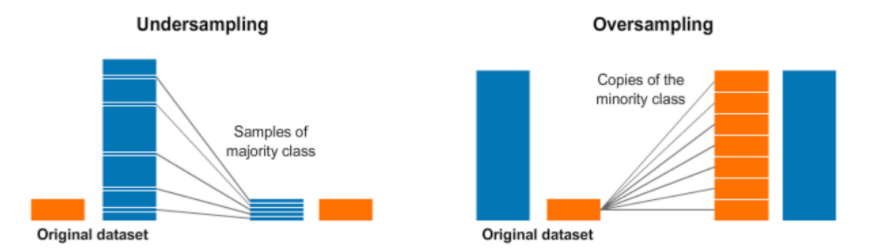<br/>

Como mostra a figura acima, eles basicamente são métodos que equaliza a quantidade das classificações desbalanceadas. Em outras palavras, ou ele irá diminuir o conjunto de observações com a classificação majoritária, ou irá aumentar as observações com a classificação minoritária.

Como nosso dataset já possui um tamanho consideravelmente grande, iremos aqui optar pela técnica de under-sampling.

In [14]:
#Balancear as classes pelo undersampling

#Separar nossas classes
df_tr_fraud = df[df['isFraud'] == 1]
df_tr_norm = df[df['isFraud'] == 0]

#Diminuir nossa classe maior para o tamanho da nossa classe menor
df_tr_norm_under = df_tr_norm.sample(transacoes_fraudulentas, random_state=1)

#Juntar nossas classes novamente
df_balanceado = pd.concat([df_tr_fraud, df_tr_norm_under])
df_balanceado = df_balanceado.reset_index(drop=True)

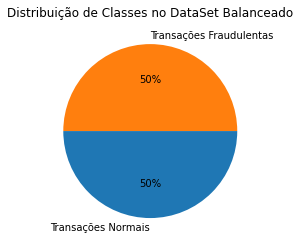

In [15]:
#Exibir distribuição do novo dataset balanceado
plt.pie(
        [len(df_balanceado[df_balanceado['isFraud'] == 1]), len(df_balanceado[df_balanceado['isFraud'] == 0])],
        labels=['Transações Fraudulentas', 'Transações Normais'],
        autopct='%1.0f%%',
        colors=['tab:orange', 'tab:blue']
       )
plt.title('Distribuição de Classes no DataSet Balanceado')
plt.show()

Com nossos dados balanceados, vamos conferir a existência de correlação entre as informações dos nossos dados.

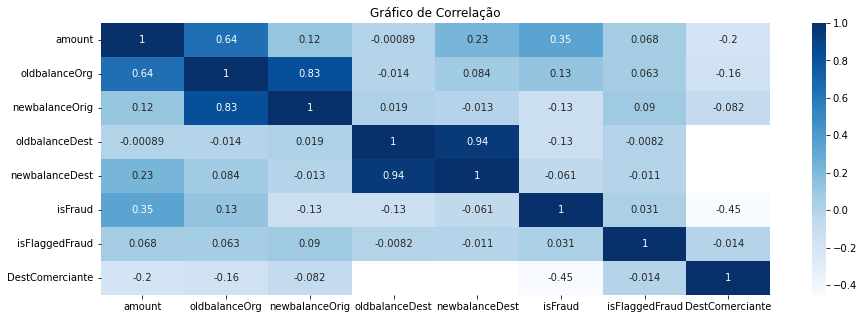

In [16]:
#Plotar gráfico de correlação
plt.figure(figsize=(15,5))
sns.heatmap(df_balanceado.corr(), cmap='Blues', annot=True)
plt.title('Gráfico de Correlação')
plt.show()

Pelo nosso gráfico de correlação podemos tirar algumas observações:

- Existe uma correlação muito forte entre as informações de saldo inicial e final das contas do cliente de origem e destino. O que já era de se esperar. Talvez estas informações estejam redundantes em nosso modelo (oldbalanceOrg/newbalanceOrig e oldbalanceDest/newbalanceDest)


- Existe uma certa correlação negativa entre o destinatário ser comerciante e a fraude. Não é muito significativa, mas aparentemente as fraudes geralmente são feitas através de contas de clientes normais.

Após toda a análise dos dados, voltaremos com os valores 0 em 'oldbalanceDest' e 'newbalanceDest' no nosso df balanceado para conseguirmos criar o modelo de machine learning.

In [17]:
#Preencher valores vazios com 0
df_balanceado = df_balanceado.fillna(0)

**Separar os Dados**

Neste processo, vamos definir as variáveis independentes (x), características, e dependentes (y), classificação. Usando as variáveis definidas, dividiremos os dados em um conjunto de treinamento e um conjunto de teste que será usado para modelagem e avaliação.

In [18]:
#Separa dados em x e y
x = df_balanceado.drop('isFraud', axis=1)
y = df_balanceado['isFraud']

Como nossa coluna type é um object e nosso modelo precisa trabalhar somente com números, iremos corrigi-la criando variáveis dummies.

O que é criar Variáveis Dummies?

Trata-se de converter uma variável categórica em variáveis fictícias. Criando variáveis dummies transformamos as classes de cada característica em novas características, porém, com informações em valores binários.

Abaixo podemos visualizar nosso dataset com esse tipo de variáveis.

In [19]:
#Criar variáveis dummies
x = pd.get_dummies(x)
display(x.head())

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,DestComerciante,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,181.0,181.0,0.0,0.0,0.0,0,0,0,0,0,0,1
1,181.0,181.0,0.0,21182.0,0.0,0,0,0,1,0,0,0
2,2806.0,2806.0,0.0,0.0,0.0,0,0,0,0,0,0,1
3,2806.0,2806.0,0.0,26202.0,0.0,0,0,0,1,0,0,0
4,20128.0,20128.0,0.0,0.0,0.0,0,0,0,0,0,0,1


In [20]:
#Separar dados de treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2, random_state=1)
#test_size para definir o ponto em que os dados serão particionados
#random_state para para que a chamada da função seja replicável. Caso não seja informado os dados serão sempre diferentes

**Criar o Modelo Random Forest**

Com nosso dataset definido e com as variáveis já separadas, podemos agora criar nosso modelo.

In [21]:
#Criar modelo
classificar_fraude = RandomForestClassifier(n_estimators=100, random_state=1)

#Treinar modelo
classificar_fraude.fit(x_treino, y_treino)

#Testar modelo
y_pred = classificar_fraude.predict(x_teste)

Com nosso modelo criado conseguimos visualizar nossas árvores de decisão. Mas, como criamos uma floresta com 100 árvores de decisão, para exemplificar, plotaremos abaixo a árvore aleatória de número 50.

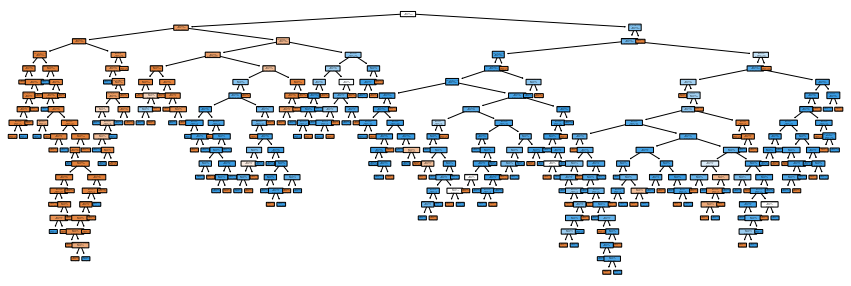

In [22]:
n_arvore=50

fig = plt.figure(figsize=(15, 5))
plot_tree(
          classificar_fraude.estimators_[n_arvore],
          feature_names=x.columns,
          filled=True, impurity=True, rounded=True
         )
plt.show()

Nossa árvore possui muitas ramificações, para tornar ainda mais visual, plotaremos abaixo a mesma árvore porém com apenas duas ramificações abaixo do nosso nó raiz.

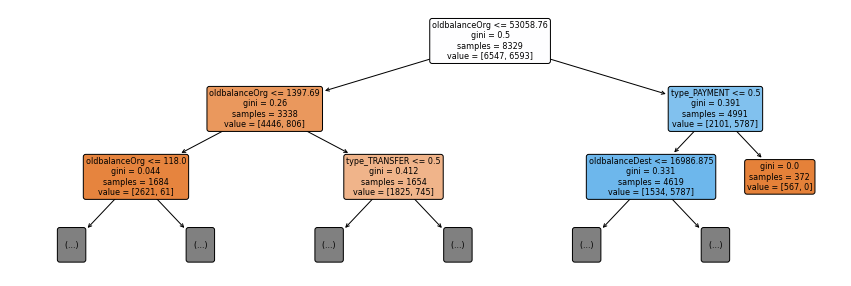

In [23]:
fig = plt.figure(figsize=(15, 5))
plot_tree(
          classificar_fraude.estimators_[n_arvore],
          feature_names=x.columns,
          max_depth=2,
          filled=True, impurity=True, rounded=True
         )
plt.show()

**Avaliar Modelo**

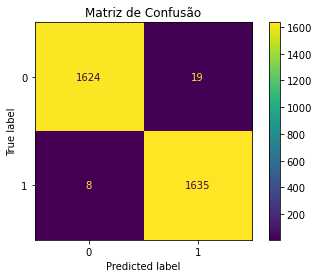



Relatório de Classificação:

               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1643
           1       0.99      1.00      0.99      1643

    accuracy                           0.99      3286
   macro avg       0.99      0.99      0.99      3286
weighted avg       0.99      0.99      0.99      3286



In [24]:
#Avaliar modelo
grafico = ConfusionMatrixDisplay(confusion_matrix(y_teste, y_pred), display_labels=classificar_fraude.classes_)
grafico.plot()
plt.title('Matriz de Confusão')
plt.show()

print('\n\nRelatório de Classificação:\n\n',classification_report(y_teste, y_pred))

Pela matriz de confusão observamos que:

- O modelo acertou 1624 transações que não eram fraudulentas e 1635 que eram
- O modelo errou 19 transações que não eram fraudulentas dizendo serem e 8 que eram dizendo não serem 

Complementando com o relatório de classificação, temos que, nosso modelo obteve:

- Acuracidade de 99% em suas classificações.
- 100% de precisão sobre as transações que não eram fraude e 99% sobre as que eram
- 100% de recall sobre as fraudes e 99% sobre as transações normais.

Ou seja, excelentes resultados.

Conseguimos analisar ainda quais foram as características mais relevantes para a previsão do modelo:

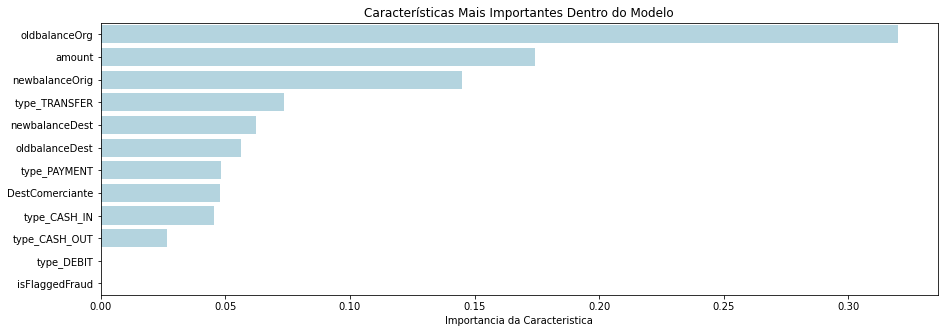

In [25]:
#Exibir grafico de importancias

#Gerar dados
feature_importances = pd.DataFrame(classificar_fraude.feature_importances_, x.columns)
feature_importances = feature_importances.sort_values(by=0, ascending=False)
feature_importances = feature_importances.rename(columns={0: 'Importancia da Caracteristica'})

#Plotar grafico
plt.figure(figsize=(15,5))
sns.barplot(x=feature_importances['Importancia da Caracteristica'], y=feature_importances.index, color='lightblue')
plt.title('Características Mais Importantes Dentro do Modelo')
plt.show()

Pelo gráfico das características mais importantes dentro do modelo vemos alguns pontos importantes:

- A marcação de 'isFlaggedfraud' que poderia ser um indicativo importante para tentativas de fraude, pouco importa dentro do modelo. Pelas regras de negócio estabelecidas conforme o dicionário, apenas 16 vezes houve a sinalização de uma fraude que de fato ocorreu frente as outras 8197 vezes que ocorreram e não foram sinalizadas

- Nota-se também que o tipo de movimentação sendo na forma de débito aparenta ser a mais segura enquanto a de transferência necessita de mais atenção

- Apesar da forte correlação entre o oldBalanceOrg e newbalanceOrig, indicando certa redundância das informações, ambos possuem forte influência na detecção de fraude

**Conclusão**

Obtemos um modelo de detecção de fraude com acuracidade de 99%, um ótimo resultado. Em nossa precisão e recall também tivemos resultado satisfatórios, variando entre 99 e 100%. Um bom indício visto que neste problema para detecção de fraude em uma companhia financeira o custo dos Falsos Positivos e Falsos Negativos podem ser altos para clientes e companhia respectivamente. Isso porque um Falso Positivo pode inviabilizar uma transferência de um cliente, gerando constrangimento, e um Falso Negativo gera prejuízo financeiro à companhia, visto que ocorrerá uma transação fraudulenta sob a responsabilidade da instituição.

Um ponto que poderia aperfeiçoar a análise e o modelo seria a maior descrição sobre as informações de step. Talvez assim poderíamos encontrar algum padrão temporal sobre as fraudes ou desmistificar algumas concepções que já temos predefinidas como "transferências a noite serem mais suspeitas".